In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r'..\data\in-process\health_processed.csv', index_col = 0)

In [3]:
df.head(2)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,...,fetal_health,PD_0.0,PD_0.001,PD_0.002,PD_0.003,PD_0.004,PD_0.005,HT_-1.0,HT_0.0,HT_1.0
0,120.0,0.000,0.0,0.000,0.000,0.0,73.0,0.5,43.0,2.4,...,2.0,1,0,0,0,0,0,0,0,1
1,132.0,0.006,0.0,0.006,0.003,0.0,17.0,2.1,0.0,10.4,...,1.0,1,0,0,0,0,0,0,1,0


In [4]:
X = df.drop(['fetal_health'], axis = 1)
y = df['fetal_health']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = .3, random_state = 42)

In [6]:
'''
#scale data first
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
oversample = SMOTE(random_state = 42)
X_samp, y_samp = oversample.fit_resample(X_train_scaled, y_train)
y_samp = y_samp.astype('int')-1
y_test = y_test.astype('int')-1
'''

"\n#scale data first\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train_scaled = scaler.transform(X_train)\nX_test_scaled = scaler.transform(X_test)\noversample = SMOTE(random_state = 42)\nX_samp, y_samp = oversample.fit_resample(X_train_scaled, y_train)\ny_samp = y_samp.astype('int')-1\ny_test = y_test.astype('int')-1\n"

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 1551 to 181
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1479 non-null   float64
 1   accelerations                                           1479 non-null   float64
 2   fetal_movement                                          1479 non-null   float64
 3   uterine_contractions                                    1479 non-null   float64
 4   light_decelerations                                     1479 non-null   float64
 5   severe_decelerations                                    1479 non-null   float64
 6   abnormal_short_term_variability                         1479 non-null   float64
 7   mean_value_of_short_term_variability                    1479 non-null   float64
 8   percentage_of_time_with_abnormal_lon

In [8]:
# Trying a different method. Using SMOTE-NC, then scaling

oversample = SMOTENC(range(19, 28), random_state = 42)
X_samp, y_samp = oversample.fit_resample(X_train, y_train)
y_samp = y_samp.astype('int')-1
y_test = y_test.astype('int')-1

<AxesSubplot:xlabel='fetal_health', ylabel='Count'>

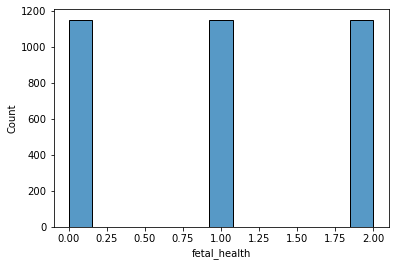

In [9]:
sns.histplot(y_samp)

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_samp = scaler.transform(X_samp)
X_test_scaled = scaler.transform(X_test)

### Baseline KNN Models

In [11]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_samp,y_samp)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [12]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))


Best Score:0.9612357059802751
Best Parameters: {'n_neighbors': 1}


In [13]:
knn2 = KNeighborsClassifier(1)
knn2.fit(X_samp,y_samp)
print(knn2.score(X_test_scaled,y_test))

0.9116719242902208


In [14]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
y_pred2 = knn2.predict(X_test_scaled)
pl = confusion_matrix(y_test,y_pred2)

<AxesSubplot:>

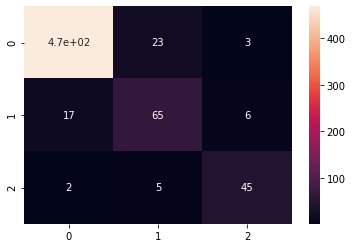

In [15]:
sns.heatmap(pl, annot=True)

In [16]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       494
           1       0.70      0.74      0.72        88
           2       0.83      0.87      0.85        52

    accuracy                           0.91       634
   macro avg       0.83      0.85      0.84       634
weighted avg       0.91      0.91      0.91       634



In [17]:
knn4 = KNeighborsClassifier(4)
knn4.fit(X_samp,y_samp)

y_pred4 = knn4.predict(X_test_scaled)
pl = confusion_matrix(y_test,y_pred4)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       494
           1       0.67      0.77      0.72        88
           2       0.81      0.73      0.77        52

    accuracy                           0.90       634
   macro avg       0.81      0.81      0.81       634
weighted avg       0.90      0.90      0.90       634



### Baseline Random Forest Model

In [18]:
param_grid = {'n_estimators':np.arange(1,50)}
clf = RandomForestClassifier(random_state = 42,n_jobs=-1)
clf_cv= GridSearchCV(clf,param_grid,cv=5)
clf_cv.fit(X_samp,y_samp)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [19]:
print("Best Score:" + str(clf_cv.best_score_))
print("Best Parameters: " + str(clf_cv.best_params_))

Best Score:0.9745430514542885
Best Parameters: {'n_estimators': 40}


In [20]:
y_pred_RF = clf_cv.predict(X_test_scaled)

print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       494
           1       0.80      0.76      0.78        88
           2       0.96      0.92      0.94        52

    accuracy                           0.94       634
   macro avg       0.91      0.88      0.89       634
weighted avg       0.94      0.94      0.94       634



### Untuned XGBoost Model

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [22]:
model3 = XGBClassifier(objective='multi:softmax', numclass=3, seed = 42, use_label_encoder=False)
model3.fit(X_samp, y_samp)
y_pred_XGB = model3.predict(X_test_scaled)
print(classification_report(y_test, y_pred_XGB))

[11:49:02] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:573: 
Parameters: { "numclass" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:49:02] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       494
           1       0.85      0.76      0.80        88
           2       0.94      0.98      0.96        52

    accuracy                           0.95       634
   macro avg       0.92      0.91      0.91       634
weighted avg     

## Optimizing Hyperparameters

In [23]:
model4 = XGBClassifier(
    objective='multi:softmax',
    #numclass=3,
    seed = 42,
    use_label_encoder=False)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 200, 20),
    'learning_rate': [0.01, 0.2, 0.05]
}

grid_search = GridSearchCV(
    estimator=model4,
    param_grid=parameters,
    scoring = 'f1_macro',
    n_jobs = -1,
    cv = 5,
    verbose=1,
    error_score="raise"
)

In [24]:
grid_search.fit(X_samp, y_samp)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[11:54:48] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_e...
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
         

In [25]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=140, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=42, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [26]:
print('Best Parameters - ', grid_search.best_params_)
print('Best Score - ', grid_search.best_score_)

y_pred_XGB_cv = grid_search.predict(X_test_scaled)
print(classification_report(y_test, y_pred_XGB_cv))

Best Parameters -  {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 140}
Best Score -  0.9763017833448393
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       494
           1       0.87      0.78      0.83        88
           2       0.98      0.98      0.98        52

    accuracy                           0.95       634
   macro avg       0.94      0.92      0.93       634
weighted avg       0.95      0.95      0.95       634



In [27]:
'''First Try with SMOTE only:

Best Parameters -  {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 180}
Best Score -  0.9782892507601625
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       494
           1       0.85      0.77      0.81        88
           2       0.98      0.96      0.97        52

    accuracy                           0.95       634
   macro avg       0.93      0.90      0.92       634
weighted avg       0.95      0.95      0.95       634


running with SMOTE-NC was a little better:
Best Parameters -  {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 140}
Best Score -  0.9763017833448393
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       494
           1       0.87      0.78      0.83        88
           2       0.98      0.98      0.98        52

    accuracy                           0.95       634
   macro avg       0.94      0.92      0.93       634
weighted avg       0.95      0.95      0.95       634
'''

"First Try with SMOTE only:\n\nBest Parameters -  {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 180}\nBest Score -  0.9782892507601625\n              precision    recall  f1-score   support\n\n           0       0.96      0.98      0.97       494\n           1       0.85      0.77      0.81        88\n           2       0.98      0.96      0.97        52\n\n    accuracy                           0.95       634\n   macro avg       0.93      0.90      0.92       634\nweighted avg       0.95      0.95      0.95       634\n\n\nrunning with SMOTE-NC was a little better:\nBest Parameters -  {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 140}\nBest Score -  0.9763017833448393\n              precision    recall  f1-score   support\n\n           0       0.96      0.98      0.97       494\n           1       0.87      0.78      0.83        88\n           2       0.98      0.98      0.98        52\n\n    accuracy                           0.95       634\n   macro avg       0.94  

In [28]:
#using only SMOTE-NC from now on
#Keeping the above hyperparameters and trying out some regularization
model5 = XGBClassifier(
    objective='multi:softmax',
    seed = 42,
    use_label_encoder=False,
    max_depth = 6,
    n_estimators = 140,
    learning_rate = 0.2
)

parameters2 = {
    'colsample_bytree': [.3, .5, .7, 1],
    'gamma': [0, .3, .7, 1,2]
}

grid_search = GridSearchCV(
    estimator=model5,
    param_grid=parameters2,
    scoring = 'f1_macro',
    n_jobs = -1,
    cv = 5,
    verbose=1,
    error_score="raise"
)

grid_search.fit(X_samp, y_samp)

print('Best Parameters - ', grid_search.best_params_)
print('Best Score - ', grid_search.best_score_)

y_pred_XGB_cv = grid_search.predict(X_test_scaled)
print(classification_report(y_test, y_pred_XGB_cv))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[11:55:25] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters -  {'colsample_bytree': 1, 'gamma': 0}
Best Score -  0.9763017833448393
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       494
           1       0.87      0.78      0.83        88
           2       0.98      0.98      0.98        52

    accuracy                           0.95       634
   macro avg       0.94      0.92      0.93       634
weighted avg       0.95      0.95      0.95       634



In [29]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=140, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=42, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

### Trying some plotting

In [30]:
from xgboost import plot_tree

In [31]:
XGBest = grid_search.best_estimator_

In [32]:
XGBest.fit(X_samp, y_samp)

[11:55:26] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=140, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=42, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

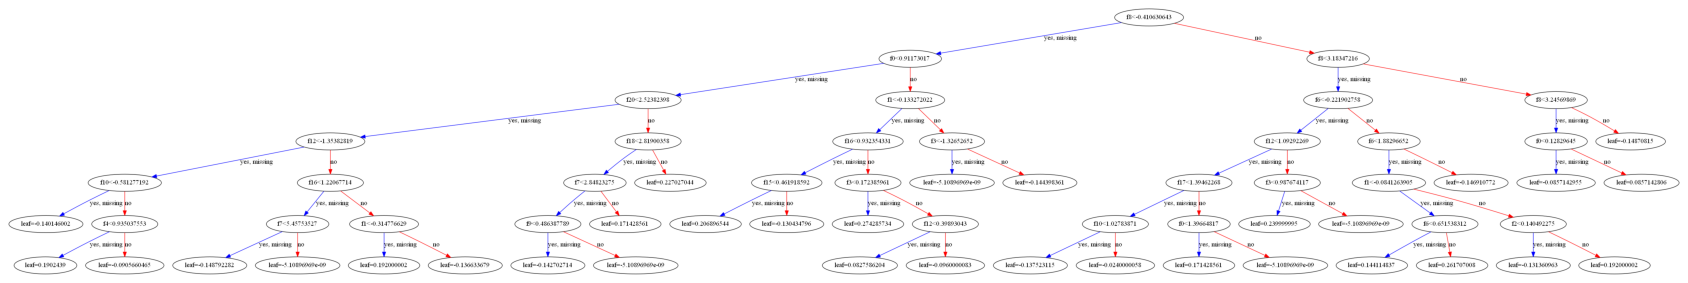

In [33]:
plot_tree(XGBest, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(30, 15)

PCA Graph of Best XGBoost ouput

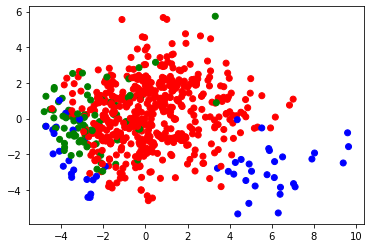

In [34]:
from sklearn.decomposition import PCA
import matplotlib.colors

cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue'])

pca = PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(X_test_scaled))
plt.scatter(pc1, pc2, c=y_pred_XGB_cv.tolist(), cmap=cmap)

PCA Graph of KNN ouput

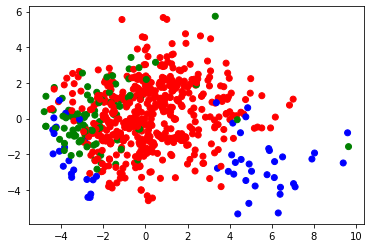

In [35]:
cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue'])

pca = PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(X_test_scaled))
plt.scatter(pc1, pc2, c=y_pred2.tolist(), cmap=cmap)